In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n = 100000

# 2025-ös dátumtartomány
dates = pd.date_range(start="2025-01-01", end="2025-12-31")

# Véletlen kezdés dátumok
kezdes_datum = np.random.choice(dates, size=n)

# Véletlen napeltolás (1–50 nap)
eltolas = np.random.randint(1, 50, size=n)

# Vég dátum = kezdés + eltolás
veg_datum = kezdes_datum + pd.to_timedelta(eltolas, unit="D")

# DataFrame létrehozása
df = pd.DataFrame({
    "sorszam": range(1, n + 1),
    "kezdes_datum": kezdes_datum,
    "veg_datum": veg_datum
})

# Számított oszlop: különbség napokban
df["napok_szama"] = (df["veg_datum"] - df["kezdes_datum"]).dt.days

print(df.head())

   sorszam kezdes_datum  veg_datum  napok_szama
0        1   2025-12-13 2026-01-09           27
1        2   2025-11-16 2025-11-26           10
2        3   2025-06-29 2025-07-08            9
3        4   2025-10-24 2025-11-11           18
4        5   2025-05-08 2025-05-31           23


In [39]:
# 2. Létrehozzuk a listát a napokhoz
df_expanded = df.loc[df.index.repeat(df["napok_szama"])].copy()
# 3. Nap indexet adunk hozzá
df_expanded["nap_a_kezdestol"] = df_expanded.groupby("sorszam").cumcount()
# 4. Dátumot számolunk
df_expanded["datum"] = df_expanded["kezdes_datum"] + pd.to_timedelta(df_expanded["nap_a_kezdestol"], unit="D")

print(df_expanded.head())


   sorszam kezdes_datum  veg_datum  napok_szama  nap_a_kezdestol      datum
0        1   2025-12-13 2026-01-09           27                0 2025-12-13
0        1   2025-12-13 2026-01-09           27                1 2025-12-14
0        1   2025-12-13 2026-01-09           27                2 2025-12-15
0        1   2025-12-13 2026-01-09           27                3 2025-12-16
0        1   2025-12-13 2026-01-09           27                4 2025-12-17


In [40]:
# Kategorizálás a 'nap_a_kezdestol' alapján
df_expanded["kategoriak"] = pd.cut(
    df_expanded["nap_a_kezdestol"],
    bins=[-1, 15, 30, df_expanded["nap_a_kezdestol"].max()],
    labels=["0-15", "16-30", "30+"]
)

# Csoportosítás dátum és kategória szerint
eredmeny = (
    df_expanded
    .groupby(["datum", "kategoriak"])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Másolás a vágólapra
eredmeny.reset_index().to_clipboard(index=False)

C:\Users\laszl\AppData\Local\Temp\ipykernel_14884\3449972453.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["datum", "kategoriak"])


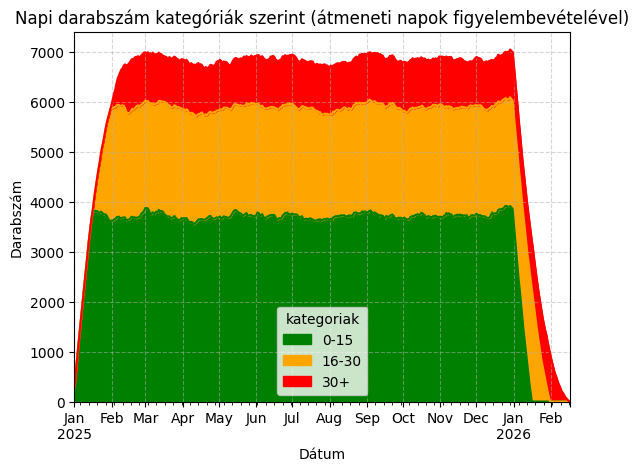

In [41]:
# Ábra
eredmeny.plot(kind="area", stacked=True,  color=["green", "orange", "red"])
plt.title("Napi darabszám kategóriák szerint (átmeneti napok figyelembevételével)")
plt.xlabel("Dátum")
plt.ylabel("Darabszám")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

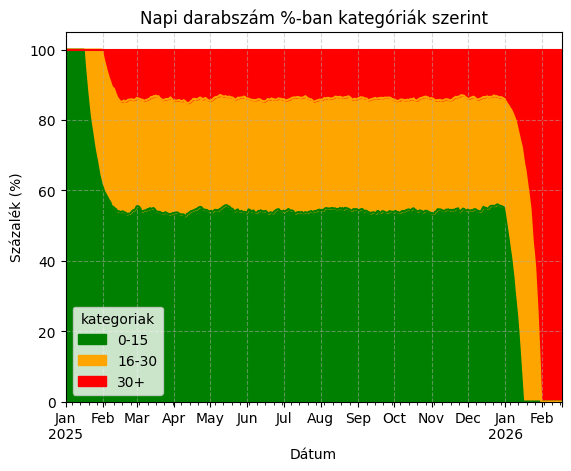

In [42]:
# 2. Változat: Normalizált ábra (százalékos)
eredmeny_percent = eredmeny.div(eredmeny.sum(axis=1), axis=0) * 100
eredmeny_percent.plot(kind="area", stacked=True, color=["green", "orange", "red"])
plt.title("Napi darabszám %-ban kategóriák szerint")
plt.xlabel("Dátum")
plt.ylabel("Százalék (%)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()